<a href="https://colab.research.google.com/github/watex95/COSERA-MACHINE-LEARNING-PROJECT/blob/master/The_best_classifier_for_loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PREDICTING THE LIKELIHOOD OF A PERSON TO DEFAULT IN LOAN REPAYMENT USING CLASSIFICATION MODELS

The data for this activity contains information about loan defaulting, whether the loanee is  student or not, ther income and balance.
The plan is to load the dataset using Pandas library, and fit several classification models to it and find the best one that could classify a loanee as either a defaulter (YES:1) or non-defaulter (NO:0). Model accuracy will be the basis of evaluating model strength.

Lets first load required libraries:

In [81]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
print('libraries imported')

libraries imported


### Load Data From my github repository  

In [82]:
whole_df = pd.read_csv("https://raw.githubusercontent.com/watex95/COSERA-MACHINE-LEARNING-PROJECT/master/Default_Rate.csv")
whole_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [83]:
whole_df.shape

(10000, 4)

### Randomly split the data and save the hold out dataset for future Model Testing

In [0]:
X_1=whole_df[['student','income','balance']]
y1=whole_df[['default']]

In [0]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(X_1, y1, test_size=0.3, random_state=4)


In [86]:
X_TEST.head()

,student,income,balance
1603,Yes,15522.58415,1247.067238
8713,Yes,12008.33574,662.995363
4561,Yes,20569.64004,970.426089
6600,Yes,11102.56815,1156.620200
2558,No,37323.75941,421.896902


In [87]:
y_TEST.head()

,default
1603,No
8713,No
4561,No
6600,No
2558,No


### Save the test dataset and its actual target for confirmation later if the model prediction can predict a new dataset with same high accuracy

The test data will be downloaded from this instance and saved in github , it will be loaded again during Prediction phase

In [88]:
X_TEST.to_csv('/content/sample_data/TEST_DATA.csv')
y_TEST.to_csv('/content/sample_data/Target_actual.csv')
print('files saved')


files saved


### Create a train dataset by merging the target to the features

In [0]:
df=pd.concat([X_TRAIN,y_TRAIN],axis=1)

In [90]:
df.head()

,student,income,balance,default
9232,No,50491.26051,1074.015910,No
2210,Yes,18241.74144,953.809047,No
3611,No,14792.51184,379.063067,No
7095,No,50040.41979,636.309344,No
6444,No,22431.45354,0.000000,No


## Exploratory data analysis

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
pp.ProfileReport(df)


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,7000
Total Missing (%),0.0%
Total size in memory,273.6 KiB
Average record size in memory,40.0 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Data visualization and Qualitative analysis



Let’s see how many of each class is in our data set 

In [92]:
df['default'].value_counts()

No     6767
Yes     233
Name: default, dtype: int64

In [93]:
df['student'].value_counts()

No     4937
Yes    2063
Name: student, dtype: int64

Lets plot some columns to underestand data better:

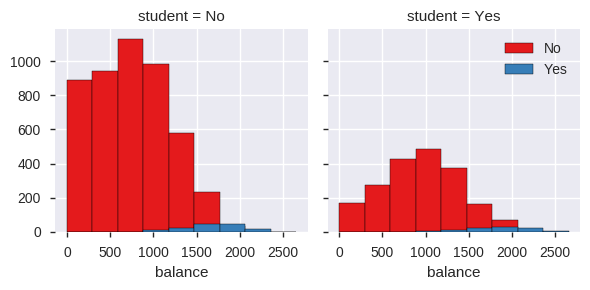

In [94]:
import seaborn as sns

bins = np.linspace(df.balance.min(), df.balance.max(), 10)
g = sns.FacetGrid(df, col="student", hue="default", palette="Set1", col_wrap=2)
g.map(plt.hist, 'balance', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

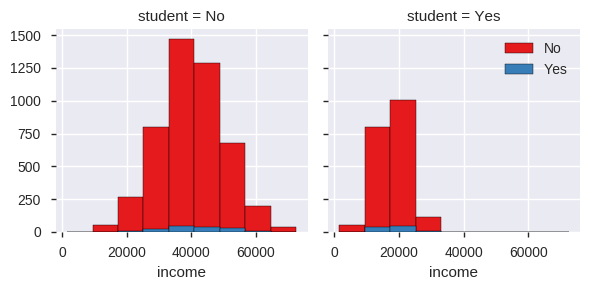

In [95]:
bins = np.linspace(df.income.min(), df.income.max(), 10)
g = sns.FacetGrid(df, col="student", hue="default", palette="Set1", col_wrap=2)
g.map(plt.hist, 'income', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

## Convert Categorical labelled features to numerical values

Lets look at student defaulting distribution:

In [96]:
df.groupby(['student'])['default'].value_counts(normalize=True)

student  default
No       No         0.970832
         Yes        0.029168
Yes      No         0.956859
         Yes        0.043141
Name: default, dtype: float64

Lets convert Yes to 1 and No to 0:


In [97]:
df.head()

,student,income,balance,default
9232,No,50491.26051,1074.015910,No
2210,Yes,18241.74144,953.809047,No
3611,No,14792.51184,379.063067,No
7095,No,50040.41979,636.309344,No
6444,No,22431.45354,0.000000,No


In [98]:
df['student'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['default'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df.head()

,student,income,balance,default
9232,0,50491.26051,1074.015910,0
2210,1,18241.74144,953.809047,0
3611,0,14792.51184,379.063067,0
7095,0,50040.41979,636.309344,0
6444,0,22431.45354,0.000000,0


### Feature selection

Lets defind feature sets, X:

In [99]:
Feature=df[['student','balance','income']]
X = Feature
X[0:5]

,student,balance,income
9232,0,1074.015910,50491.26051
2210,1,953.809047,18241.74144
3611,0,379.063067,14792.51184
7095,0,636.309344,50040.41979
6444,0,0.000000,22431.45354


What are our lables?

In [100]:
y = df['default'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Standardizing the Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [101]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.64642486,  0.49857738,  1.26983947],
       [ 1.54697021,  0.25134605, -1.1527695 ],
       [-0.64642486, -0.93074295, -1.41187831],
       [-0.64642486, -0.40166053,  1.23597197],
       [-0.64642486, -1.71036787, -0.83803507]])

# Classification 

From this stage we will use the training set to build an accurate model. Then use the test set to report the accuracy of the model
The models to be used are as follows:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural network




# K Nearest Neighbor(KNN) model
Notice: The plan is to find the best k to build the model with the best accuracy.  


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)


Initializing the Metric Reporting Dictionary

In [0]:

metric_report_dict = {'Algorithm':[],'Jaccard Index':[],'F1 Score':[],'Log Loss':[]}

Import all the Classification Algorithms

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Function to test different values of K and get optimum K value

In [105]:

myList = list(range(1,20))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

for k in neighbors:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = neigh.predict(X_val)
    print("Value of K is: ", k)
    print("Test set Accuracy for K : ", metrics.accuracy_score(y_val, yhat))
    
# From this list the best value of K is 35 we will therefore use 35 to create our KNN model
    

Value of K is:  1
Test set Accuracy for K :  0.9507142857142857
Value of K is:  3
Test set Accuracy for K :  0.9678571428571429
Value of K is:  5
Test set Accuracy for K :  0.9707142857142858
Value of K is:  7
Test set Accuracy for K :  0.97
Value of K is:  9
Test set Accuracy for K :  0.9692857142857143
Value of K is:  11
Test set Accuracy for K :  0.9685714285714285
Value of K is:  13
Test set Accuracy for K :  0.9685714285714285
Value of K is:  15
Test set Accuracy for K :  0.97
Value of K is:  17
Test set Accuracy for K :  0.97
Value of K is:  19
Test set Accuracy for K :  0.9692857142857143


Our selected K values is K Nearest Neighbour

In [106]:

k = 7
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

yhat_knn = knn_model.predict(X_val)

print("Value of K is: ", k)
print("Test set Accuracy for K : ", metrics.accuracy_score(y_val, yhat_knn))

Value of K is:  7
Test set Accuracy for K :  0.97


In [107]:
yhat_knn

array([0, 0, 0, ..., 0, 0, 0])

### Defining the metrics for KNN

In [0]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [109]:
metric_report_dict["Algorithm"].append("KNN")
metric_report_dict["Log Loss"].append(np.nan)
metric_report_dict["Jaccard Index"].append(jaccard_similarity_score(y_val, yhat_knn))
metric_report_dict["F1 Score"].append(f1_score(y_val, yhat_knn, average='weighted'))
#metric_report_dict["Accuracy Score"].append(metrics.accuracy_score(y_test, yhat))

print("Algorithm","KNN")
print("Jaccard Similarity : ", jaccard_similarity_score(y_val, yhat_knn))
print("F1 Score : ", f1_score(y_val, yhat_knn, average='weighted'))
print("Log Loss: ",np.NaN)


Algorithm KNN
Jaccard Similarity :  0.97
F1 Score :  0.9647262952101663
Log Loss:  nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Decision Tree model

In [110]:
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
loan_tree.fit(X_train, y_train)
yhat_tree = loan_tree.predict(X_val)

print("Decision Tree Accuracy before Parameter Tuning: ", metrics.accuracy_score(y_val, yhat_tree))


Decision Tree Accuracy before Parameter Tuning:  0.9692857142857143


In [111]:
# using grid search for best parameters
def dtree_param_selection(X, y, nfolds):
    parameters = {'min_samples_split': range(10,500,20), 'max_depth': range(1,20,2), 'criterion':['gini','entropy']}
    tree = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree, parameters)
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

dtree_param = dtree_param_selection(X_train, y_train, 10)
dtree_param

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}

### Defining metrics for decision tree

In [112]:
metric_report_dict["Algorithm"].append("Decision Tree")
metric_report_dict["Log Loss"].append(np.nan)
metric_report_dict["Jaccard Index"].append(jaccard_similarity_score(y_val, yhat))
metric_report_dict["F1 Score"].append(f1_score(y_val, yhat, average='weighted'))
#metric_report_dict["Accuracy Score"].append(metrics.accuracy_score(y_test, yhat))

print("Algorithm: ","Decision Tree")
print("Jaccard Similarity : ", jaccard_similarity_score(y_val, yhat))
print("F1 Score : ", f1_score(y_val, yhat, average='weighted'))
print("Log Loss: ",np.NaN)

Algorithm:  Decision Tree
Jaccard Similarity :  0.9692857142857143
F1 Score :  0.9609503511549549
Log Loss:  nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Support Vector Machine model

In [113]:

svm_model = svm.SVC(kernel="rbf",probability=True)
svm_model.fit(X_train, y_train)
yhat_svm = svm_model.predict(X_val)

print("Support Vector Machine Accuracy before Parameter Tuning is: ", metrics.accuracy_score(y_val, yhat))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine Accuracy before Parameter Tuning is:  0.9692857142857143


In [145]:
# svm parameter selection
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]    
    Cs = [0.001, 0.01, 0.1, 1, 10]

    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svm_model = svm.SVC(kernel="rbf",probability=True)
svm_model.fit(X_train, y_train)
yhat = svm_model.predict(X_val)
svc_param = svc_param_selection(X_train, y_train, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [147]:
svm_model = svm.SVC(kernel="rbf", C=svc_param['C'], gamma=svc_param['gamma'],probability=True)
svm_model=svm_model.fit(X_train, y_train)
yhat_svm2 = svm_model.predict(X_val)

print("Support Vector Machine Accuracy after Parameter Tuning is: ", metrics.accuracy_score(y_val, yhat_svm2))

Support Vector Machine Accuracy after Parameter Tuning is:  0.9692857142857143


### Defining metrics for SVM

In [116]:

metric_report_dict['Algorithm'].append("SVM")
metric_report_dict['Log Loss'].append(np.nan)
metric_report_dict['Jaccard Index'].append(jaccard_similarity_score(y_val, yhat_svm2))
metric_report_dict["F1 Score"].append(f1_score(y_val, yhat_svm2, average='weighted'))
#metric_report_dict["Accuracy Score"].append(metrics.accuracy_score(y_test, yhat))
print("Algorithm: ","SVM")
print("Jaccard Similarity : ", jaccard_similarity_score(y_val, yhat_svm2))
print("F1 Score : ", f1_score(y_val, yhat_svm2, average='weighted'))
print("Log Loss: ",np.NaN)


Algorithm:  SVM
Jaccard Similarity :  0.9692857142857143
F1 Score :  0.9601781791846972
Log Loss:  nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Logistic Regression model

In [117]:
LR = LogisticRegression(solver='liblinear').fit(X_train, y_train)
yhat_lr = LR.predict(X_val)
accuracy_before_tuning = metrics.accuracy_score(y_val, yhat_lr)
print("LR Accuracy before Parameter Tuning is: ", accuracy_before_tuning)

LR Accuracy before Parameter Tuning is:  0.9721428571428572


In [0]:
# logistics regression = finding the best parameter
def logistics_param_selection(X, y, nfolds):
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver':['liblinear']}
    gridsearch = GridSearchCV(LogisticRegression(), param_grid, cv=nfolds)
    gridsearch.fit(X, y)
    return gridsearch.best_params_


logistics_param = logistics_param_selection(X_train, y_train, 10)

In [119]:
LR_tuned = LogisticRegression(solver='liblinear').fit(X_train, y_train)

yhat_lr2 = LR_tuned.predict(X_val)
yhat_lr2_proba = LR_tuned.predict_proba(X_val)
accuracy_after_tuning = metrics.accuracy_score(y_val, yhat_lr2)
print("LR Accuracy after parameter tuning is: ", accuracy_after_tuning)

LR Accuracy after parameter tuning is:  0.9721428571428572


### Defining metrics for logistic regression

In [120]:
metric_report_dict["Algorithm"].append("Logistics Regression")
metric_report_dict["Jaccard Index"].append(jaccard_similarity_score(y_val, yhat_lr2))
metric_report_dict["F1 Score"].append(f1_score(y_val, yhat_lr2, average='weighted'))
metric_report_dict["Log Loss"].append(log_loss(y_val, yhat_lr2_proba))


print("Algorithm ","LogisticRhegression")
print("Jaccard Similarity : ", jaccard_similarity_score(y_val, yhat_lr2))
print("F1 Score : ", f1_score(y_val, yhat, average='weighted'))
print("log-loss: ",log_loss(y_val, yhat_lr2_proba))

Algorithm  LogisticRhegression
Jaccard Similarity :  0.9721428571428572
F1 Score :  0.9598739907945368
log-loss:  0.08092960975808615


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Multilayer perceptron model:  Sequential models

### Initialize tensorflow

In [121]:
%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

1.15.0


### Load the keras libraries to be used for deep learning

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Model building

In [0]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(3,)),
  Dense(32, activation='relu'),
  Dense(2, activation='sigmoid'),
])

### Model compliling

In [0]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

### Train the model

In [125]:
history=model.fit( X_train, to_categorical(y_train), epochs=5, batch_size=32,
   validation_data=(X_val, to_categorical(y_val))
)

Train on 5600 samples, validate on 1400 samples
Epoch 1/5
5600/5600 [==============================] - 1s 225us/step - loss: 0.2076 - acc: 0.9520 - val_loss: 0.1106 - val_acc: 0.9650
Epoch 2/5
5600/5600 [==============================] - 1s 161us/step - loss: 0.0908 - acc: 0.9674 - val_loss: 0.0917 - val_acc: 0.9682
Epoch 3/5
5600/5600 [==============================] - 1s 155us/step - loss: 0.0834 - acc: 0.9716 - val_loss: 0.0874 - val_acc: 0.9696
Epoch 4/5
5600/5600 [==============================] - 1s 160us/step - loss: 0.0826 - acc: 0.9727 - val_loss: 0.0862 - val_acc: 0.9696
Epoch 5/5
5600/5600 [==============================] - 1s 158us/step - loss: 0.0812 - acc: 0.9725 - val_loss: 0.0855 - val_acc: 0.9696


### Model evaluation

In [126]:

# Evaluate the model.
model.evaluate( X_val, to_categorical(y_val))



1400/1400 [==============================] - 0s 57us/step


[0.0855248992570809, 0.9696428568022591]

In [0]:
model.save_weights('model_nn.h5')

In [128]:
yhat_nn=model.predict_classes(X_val)
yhat_nn

array([0, 0, 0, ..., 0, 0, 0])

### Display the probabilities of defaulting in an array

In [129]:
yhat_nn_proba=model.predict(X_val)
yhat_nn_proba

array([[9.8694348e-01, 1.1447698e-02],
       [9.9999690e-01, 2.3245811e-06],
       [8.0119741e-01, 1.9425526e-01],
       ...,
       [9.8625439e-01, 1.3304681e-02],
       [9.9311423e-01, 6.6105723e-03],
       [9.5209074e-01, 4.9468994e-02]], dtype=float32)

### Dispaly model accuracy

In [130]:
accuracy_after_tuning = metrics.accuracy_score(y_val, yhat_nn)
print("Neural Network Accuracy after parameter tuning is: ", accuracy_after_tuning)

Neural Network Accuracy after parameter tuning is:  0.97


### Visualize model performance

In [131]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


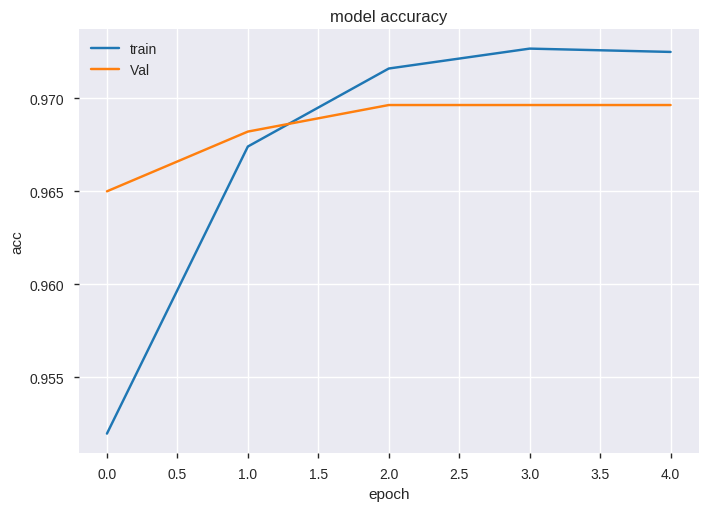

In [132]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


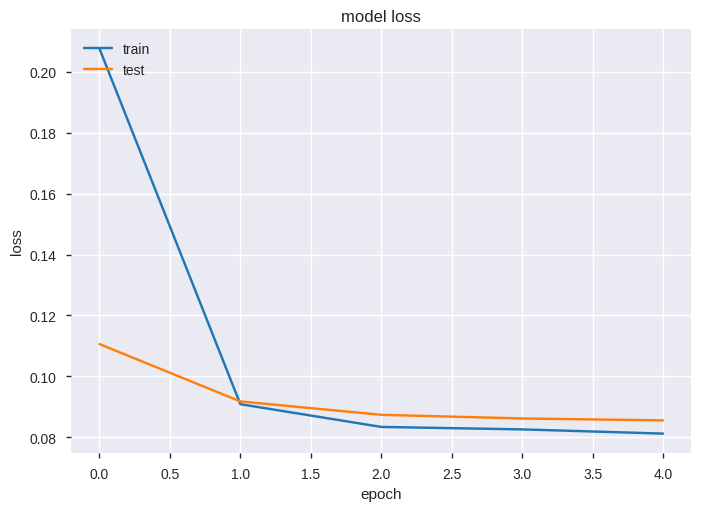

In [133]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Defining metrics for Neural network

In [134]:
metric_report_dict["Algorithm"].append("Neural network")
metric_report_dict["Jaccard Index"].append(jaccard_similarity_score(y_val, yhat_nn))
metric_report_dict["F1 Score"].append(f1_score(y_val, yhat_nn, average='weighted'))
metric_report_dict["Log Loss"].append(log_loss(y_val, yhat_nn_proba))


print("Algorithm ","LogisticRhegression")
print("Jaccard Similarity : ", jaccard_similarity_score(y_val, yhat_nn))
print("F1 Score : ", f1_score(y_val, yhat_nn, average='weighted'))
print("log-loss: ",log_loss(y_val, yhat_nn_proba))

Algorithm  LogisticRhegression
Jaccard Similarity :  0.97
F1 Score :  0.9614875468319234
log-loss:  0.08563888071172342


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Combined Metrics of all the models after training
F1_score is a measure of model accuracy
Jaccard index is a test score of simmilarity
Log loss measures the performance of the classification models in terms of penalizing the classification error, the lower the better.

In [135]:
metrics_df = pd.DataFrame(metric_report_dict)
metrics_df

,Algorithm,Jaccard Index,F1 Score,Log Loss
0,KNN,0.970000,0.964726,NaN
1,Decision Tree,0.969286,0.960950,NaN
2,SVM,0.969286,0.960178,NaN
3,Logistics Regression,0.972143,0.965239,0.080930
4,Neural network,0.970000,0.961488,0.085639


# Model Prediction using Test dataset

In [0]:
import pandas as pd
import numpy as np

### First load the test dataset:

In [137]:

test_df=pd.read_csv('https://raw.githubusercontent.com/watex95/COSERA-MACHINE-LEARNING-PROJECT/master/TEST_DATA.csv')
test_df.head()

,Unnamed: 0,student,income,balance
0,1603,Yes,15522.58415,1247.067238
1,8713,Yes,12008.33574,662.995363
2,4561,Yes,20569.64004,970.426089
3,6600,Yes,11102.56815,1156.620200
4,2558,No,37323.75941,421.896902


In [138]:
test_df.shape

(3000, 4)

### Data processing and Feature selection

In [139]:
Feature_test = test_df[['student','income','balance']]
Feature_test.head()

,student,income,balance
0,Yes,15522.58415,1247.067238
1,Yes,12008.33574,662.995363
2,Yes,20569.64004,970.426089
3,Yes,11102.56815,1156.620200
4,No,37323.75941,421.896902


In [140]:
Feature_test['student'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [141]:
x_Test=preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)

x_Test[0:5]

array([[ 1.5508776 , -1.33156221,  0.84349682],
       [ 1.5508776 , -1.59400468, -0.37933155],
       [ 1.5508776 , -0.95465037,  0.26431357],
       [ 1.5508776 , -1.66164699,  0.6541345 ],
       [-0.64479621,  0.29653965, -0.88410169]])

## K-Nearest Neighbour prediction

In [142]:
Feature_knn =x_Test

yhat_knn_test = knn_model.predict_proba(Feature_knn)

yhat_knn_test=pd.DataFrame(yhat_knn_test,columns=['No','Yes'])
yhat_knn_test.head()


,No,Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


## Decision tree Test evaluation

In [143]:
X_tree_test = x_Test

pred_tree_test = loan_tree.predict_proba(X_tree_test)
pred_tree_test1=pd.DataFrame(pred_tree_test,columns=['No','Yes'])
pred_tree_test1.head()



,Yes,No
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.996283,0.003717


## SVM prediction

In [148]:
X_svm_test = x_Test


yhat_svm_test = svm_model.predict_proba(X_svm_test)

yhat_svm_test=pd.DataFrame(yhat_svm_test,columns=['No','Yes'])


yhat_svm_test.head()


,Yes,No
0,0.950704,0.049296
1,0.975883,0.024117
2,0.968868,0.031132
3,0.954189,0.045811
4,0.975739,0.024261


## Logistic regression prediction

In [149]:
X_lr_test = np.asarray(x_Test)

yhat_lr_test = LR_tuned.predict(X_lr_test)

yhat_prob_test = LR_tuned.predict_proba(X_lr_test)

yhat_prob_test=pd.DataFrame(yhat_prob_test,columns=['No','Yes'])
yhat_prob_test.head()



,Yes,No
0,0.999911,0.000089
1,0.999953,0.000047
2,0.999774,0.000226
3,0.999961,0.000039
4,0.991228,0.008772


## Nueral network test

In [152]:

# Load the model from disk later using:
model.load_weights('model_nn.h5')
x_nn_test=x_Test


yhat_nn_test = model.predict_classes(x_nn_test)
yhat_nn_test_proba=model.predict(x_nn_test)

yhat_nn_test_proba=pd.DataFrame(yhat_nn_test_proba,columns=['No','Yes'])

yhat_nn_test_proba.head()



,No,Yes
0,0.999926,0.000062
1,0.999963,0.000037
2,0.999750,0.000217
3,0.999973,0.000022
4,0.994071,0.005562
